# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



644

In [4]:
settings = {"units": "imperial", "appid": weather_api_key}


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid=1b530a1e3a52174247075e2463f00399&units={units}&q={city}"
g_url = "http://api.openweathermap.org/data/2.5/weather?appid=1b530a1e3a52174247075e2463f00399&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(g_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | hamilton
City not found. Skipping...
Processing Record 3 of Set 1 | vestmanna
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | osa
City not found. Skipping...
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | busselton
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 1 | nabire
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | kombissiri
Processing Record 15 of Set 1 | sretensk
Processing Record 16 of Set 1 | kieta
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | sibolga
Processing Record 20 of Set 1 | tamia

Processing Record 38 of Set 4 | kawalu
Processing Record 39 of Set 4 | nuuk
Processing Record 40 of Set 4 | iralaya
Processing Record 41 of Set 4 | forrest city
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | trapani
Processing Record 44 of Set 4 | viedma
Processing Record 45 of Set 4 | ucluelet
Processing Record 46 of Set 4 | vuktyl
Processing Record 47 of Set 4 | kutum
Processing Record 48 of Set 4 | san rafael
Processing Record 49 of Set 4 | saint-augustin
Processing Record 1 of Set 5 | kalakamati
Processing Record 2 of Set 5 | pflugerville
Processing Record 3 of Set 5 | oktyabrskiy
Processing Record 4 of Set 5 | labytnangi
Processing Record 5 of Set 5 | verkhnyaya inta
Processing Record 6 of Set 5 | zyryanka
Processing Record 7 of Set 5 | severo-yeniseyskiy
Processing Record 8 of Set 5 | faya
Processing Record 9 of Set 5 | rorvik
Processing Record 10 of Set 5 | gobabis
Processing Record 11 of Set 5 | melo
City not found. Skipping...
Processing Record 12 of

Processing Record 31 of Set 8 | deputatskiy
Processing Record 32 of Set 8 | praia da vitoria
Processing Record 33 of Set 8 | axim
Processing Record 34 of Set 8 | helong
Processing Record 35 of Set 8 | launceston
Processing Record 36 of Set 8 | klaksvik
Processing Record 37 of Set 8 | chiknayakanhalli
Processing Record 38 of Set 8 | tutoia
Processing Record 39 of Set 8 | ambilobe
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 8 | coahuayana
Processing Record 42 of Set 8 | exu
Processing Record 43 of Set 8 | doka
Processing Record 44 of Set 8 | mariental
Processing Record 45 of Set 8 | sampit
Processing Record 46 of Set 8 | grand river south east
Processing Record 47 of Set 8 | sigli
Processing Record 48 of Set 8 | ler
Processing Record 49 of Set 8 | angoram
Processing Record 1 of Set 9 | erenhot
Processing Record 2 of Set 9 | lata
Processing Record 3 of Set 9 | grand gaube
Processing Record 4 of Set 9 | manado
Processing Record 5 of Set 9 | puerto santander
City not f

Processing Record 20 of Set 12 | tomatlan
Processing Record 21 of Set 12 | miranda
Processing Record 22 of Set 12 | ekhabi
Processing Record 23 of Set 12 | chipinge
Processing Record 24 of Set 12 | swan river
Processing Record 25 of Set 12 | havoysund
City not found. Skipping...
City not found. Skipping...
Processing Record 26 of Set 12 | coihaique
Processing Record 27 of Set 12 | ruteng
Processing Record 28 of Set 12 | margate
Processing Record 29 of Set 12 | kampot
Processing Record 30 of Set 12 | rumenka
Processing Record 31 of Set 12 | marzuq
Processing Record 32 of Set 12 | veraval
Processing Record 33 of Set 12 | mindupok
Processing Record 34 of Set 12 | myrtle beach
Processing Record 35 of Set 12 | buenos aires
Processing Record 36 of Set 12 | wanning
Processing Record 37 of Set 12 | beringovskiy
------------------------------
Data Retrieval Complete
------------------------------


In [9]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_dataframe = pd.DataFrame(weather_dict)

In [32]:
weather_dataframe.to_csv('output_data/cities.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

In [27]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,90,US,1580229289,68,19.73,-155.09,292.15,1.15
1,hamilton,90,US,1580229073,86,39.18,-84.53,274.82,1.50
2,vestmanna,40,FO,1580229289,76,62.16,-7.17,274.15,0.50
3,khatanga,81,RU,1580229289,97,71.97,102.50,252.15,3.57
4,osa,16,RU,1580229289,98,57.28,55.46,246.33,1.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

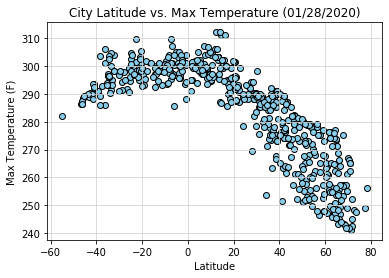

In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()


#### Latitude vs. Humidity Plot

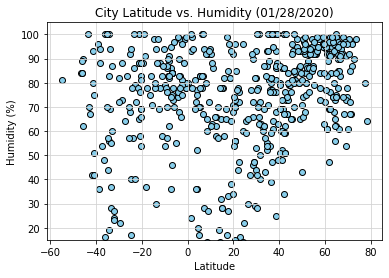

In [17]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

#### Latitude vs. Cloudiness Plot

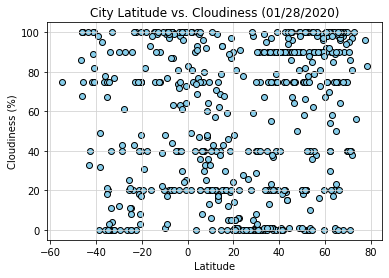

In [18]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Wind Speed Plot

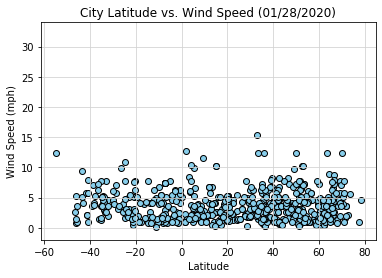

In [19]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression